# Goal: To develop a model to predict degree of aircraft damage using the      significant variables in the aviation data set given damaged aircrafts

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# Reading CSV Files
AD = pd.read_csv('AviationData.csv', encoding='latin1')
AD

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,2019-12-31,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,2019-12-31,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,08/01/2020
2,20200102X54844,Accident,ANC20CA011,2019-12-31,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,02/01/2020
3,20191230X91852,Accident,CEN20CA048,2019-12-30,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
4,20191228X62945,NaN,WPR20CA053,2019-12-28,"Missoula, MT",United States,NaN,NaN,MSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,03/01/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84257,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,NaN,VMC,APPROACH,Probable Cause,16/04/1980
84258,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause,12/09/2000
84259,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,CRUISE,Probable Cause,26/02/2007
84260,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,UNKNOWN,Probable Cause,19/09/1996


# (1) Exploratory Analysis.

# (a) Justifications on variables to use

Variables that we have chosen:
    
This includes Aircraft Category, Engine Type, Weather Condition, Broad Phase of Flight, Amateur Built, Number of Engines and Purpose of Flight. 

Justifications: 

The reason is because for the other variables in the dataset, there are incomplete information which makes it unreliable for our prediction. In addition, we felt that some of these variables are quite irrelevant in helping us to predict the severity of aircraft damage. Hence, after much consideration, we decided to choose the above 7 variables to do exploratory analysis as they are deemed suitable as our predictors. 

The 7 chosen variables might be suitable because for aircraft category, different types of aircraft has different characteristics and operating condition. For example, Helicopter and Airplane definitely function differently which can likely suffer different degree of damage when they met with an accident. 

Types of engine can also be an important predictor because different engines results in different maneuverability of the aircraft which means that there can be a difference in degree of damage depending on how they maneuver through the air. 

Weather conditions can be an important predictor because in this variable, it includes Visual Meteorological Conditions (VMC) and Instrument Meteorological Conditions (IMC). Basically, IMC is any weather condition that is worse than VMC as it has poorer visibility. Hence, different weather conditions can in fact affect the controls of the aircraft leading to different degrees of damage. 

Broad Phase of Flight is also suitable because at different phase of flight such as cruising, taking off or even landing, different accidents can happen which will result in different severity of damage. For example, during taking off, aircraft could potentially struck debris while in cruising, one aircraft could potentially collide with another oncoming aircraft. 

Amateur Built can be a suitable predictor because the building/design of aircraft can be very different for a non-professional and a professional. For instance, a professional might understand crashes of aircraft more and includes certain crash measures to help lessen the damaged to the aircraft, therefore, this predictor can suitable to evaluate the degree of aircraft damage.

Number of Engines can be suitable because higher number of engines means more maneuverability of the aircraft which might help in avoiding obstacles to a certain extent and hence, the damage taken by the aircraft can be different as compred to aircrafts with fewer or even 0 engine. 

Lastly, Purpose of Flight can be suitable as well because different applications of flight can have different risk or accidents which can then results in different degree of damage to the aircrafts. 



Thus, we will start our exploratory analysis by cleaning and creating a dataframe of Aircraft Category vs Aircraft Damage

# (b) Data cleaning and creating essential data frames to work on.

In [3]:
# Creating a new DataFrame with the chosen variables
table1 = pd.DataFrame(AD[['Aircraft.Damage','Aircraft.Category']])

# Dropping all NaN / Blanks
tablemid1= table1.dropna()
tablemid1
print(tablemid1['Aircraft.Damage'].value_counts())

Substantial    21846
Destroyed       3601
Minor            933
Name: Aircraft.Damage, dtype: int64


In [4]:
# Filtering out the desired category of Aircraft
new1 = tablemid1['Aircraft.Category'].isin(['Airplane','Helicopter','Gyrocraft','Gyroplane'])
tablefinal1 = tablemid1[new1]
tablefinal1

,Aircraft.Damage,Aircraft.Category
0,Substantial,Airplane
1,Destroyed,Airplane
2,Substantial,Airplane
3,Substantial,Airplane
5,Destroyed,Airplane
...,...,...
84248,Substantial,Helicopter
84249,Destroyed,Airplane
84250,Substantial,Airplane
84251,Substantial,Airplane


As we can see here, after cleaning the data for Aircraft Category, the number of rows decreased significantly from 84262 to 25603. This results in us losing significant amount of data when we use Aircraft Category as a variable to predict the severity of damage. 

Next, we will clean and create a dataframe of Engine Type vs Aircraft Damage

In [5]:
# Creating a new DataFrame with the chosen variables
table2 = pd.DataFrame(AD[['Aircraft.Damage','Engine.Type']])
table2

# Dropping all NaN / Blanks
tablemid2= table2.dropna()
tablemid2

,Aircraft.Damage,Engine.Type
0,Substantial,Reciprocating
1,Destroyed,Reciprocating
5,Destroyed,Turbo Prop
6,Substantial,Turbo Shaft
10,Destroyed,Reciprocating
...,...,...
84256,Substantial,Turbo Fan
84258,Destroyed,Reciprocating
84259,Destroyed,Reciprocating
84260,Destroyed,Reciprocating


In [6]:
# Dropping Unknown for Engine.Type
to_drop = ['Unknown']
tablefinal2 = tablemid2[~tablemid2['Engine.Type'].isin(to_drop)]

tablefinal2

,Aircraft.Damage,Engine.Type
0,Substantial,Reciprocating
1,Destroyed,Reciprocating
5,Destroyed,Turbo Prop
6,Substantial,Turbo Shaft
10,Destroyed,Reciprocating
...,...,...
84256,Substantial,Turbo Fan
84258,Destroyed,Reciprocating
84259,Destroyed,Reciprocating
84260,Destroyed,Reciprocating


Next, we will clean and create a dataframe of Weather Condition vs Aircraft Damage

In [7]:
# Creating a new DataFrame with the chosen variables
table3 = pd.DataFrame(AD[['Aircraft.Damage','Weather.Condition']])
table3

# Dropping all NaN / Blanks
tablemid3= table3.dropna()
tablemid3

,Aircraft.Damage,Weather.Condition
0,Substantial,VMC
1,Destroyed,VMC
5,Destroyed,IMC
6,Substantial,VMC
9,Substantial,VMC
...,...,...
84257,Destroyed,VMC
84258,Destroyed,IMC
84259,Destroyed,IMC
84260,Destroyed,UNK


In [8]:
# Dropping Unknown for Engine.Type
to_drop = ['UNK']
tablefinal3 = tablemid3[~tablemid3['Weather.Condition'].isin(to_drop)]

tablefinal3

,Aircraft.Damage,Weather.Condition
0,Substantial,VMC
1,Destroyed,VMC
5,Destroyed,IMC
6,Substantial,VMC
9,Substantial,VMC
...,...,...
84255,Destroyed,IMC
84256,Substantial,VMC
84257,Destroyed,VMC
84258,Destroyed,IMC


Next, we will clean and create a dataframe of Broad Phase Of Flight vs Aircraft Damage

In [9]:
# Creating a new DataFrame with the chosen variables
table4 = pd.DataFrame(AD[['Aircraft.Damage','Broad.Phase.of.Flight']])
table4

# Dropping all NaN / Blanks
tablemid4= table4.dropna()
tablemid4

,Aircraft.Damage,Broad.Phase.of.Flight
0,Substantial,TAKEOFF
1,Destroyed,TAKEOFF
5,Destroyed,TAKEOFF
6,Substantial,APPROACH
7,Destroyed,CRUISE
...,...,...
84257,Destroyed,APPROACH
84258,Destroyed,CRUISE
84259,Destroyed,CRUISE
84260,Destroyed,UNKNOWN


In [10]:
# Dropping Unknown for Engine.Type
to_drop = ['UNKNOWN']
tablefinal4 = tablemid4[~tablemid4['Broad.Phase.of.Flight'].isin(to_drop)]

tablefinal4

,Aircraft.Damage,Broad.Phase.of.Flight
0,Substantial,TAKEOFF
1,Destroyed,TAKEOFF
5,Destroyed,TAKEOFF
6,Substantial,APPROACH
7,Destroyed,CRUISE
...,...,...
84256,Substantial,CLIMB
84257,Destroyed,APPROACH
84258,Destroyed,CRUISE
84259,Destroyed,CRUISE


Next, we will clean and create a dataframe of Amateur Built vs Aircraft Damage

In [11]:
# Creating a new DataFrame with the chosen variables
table5 = pd.DataFrame(AD[['Aircraft.Damage','Amateur.Built']])
table5 

,Aircraft.Damage,Amateur.Built
0,Substantial,No
1,Destroyed,No
2,Substantial,No
3,Substantial,Yes
4,Substantial,No
...,...,...
84257,Destroyed,No
84258,Destroyed,No
84259,Destroyed,No
84260,Destroyed,No


In [12]:
# Dropping all NaN / Blanks
tablefinal5= table5.dropna()
tablefinal5

,Aircraft.Damage,Amateur.Built
0,Substantial,No
1,Destroyed,No
2,Substantial,No
3,Substantial,Yes
4,Substantial,No
...,...,...
84257,Destroyed,No
84258,Destroyed,No
84259,Destroyed,No
84260,Destroyed,No


Next, we will clean and create a dataframe of Number of Engines vs Aircraft Damage

In [13]:
# Creating a new DataFrame with the chosen variables
table6 = pd.DataFrame(AD[['Aircraft.Damage','Number.of.Engines']])
table6

,Aircraft.Damage,Number.of.Engines
0,Substantial,1.0
1,Destroyed,1.0
2,Substantial,1.0
3,Substantial,NaN
4,Substantial,1.0
...,...,...
84257,Destroyed,NaN
84258,Destroyed,1.0
84259,Destroyed,1.0
84260,Destroyed,1.0


In [14]:
# Dropping all NaN / Blanks
tablemid6= table6.dropna()
tablemid_6 = pd.DataFrame(tablemid6['Aircraft.Damage'])
tablemid6 = pd.DataFrame(tablemid6['Number.of.Engines'].astype('int64').apply(str))

tablefinal6 = pd.concat([tablemid_6,tablemid6], axis=1)
tablefinal6

,Aircraft.Damage,Number.of.Engines
0,Substantial,1
1,Destroyed,1
2,Substantial,1
4,Substantial,1
5,Destroyed,2
...,...,...
84256,Substantial,2
84258,Destroyed,1
84259,Destroyed,1
84260,Destroyed,1


Next, we will clean and create a dataframe of Purpose of Flight vs Aircraft Damage

In [15]:
# Creating a new DataFrame with the chosen variables
table7 = pd.DataFrame(AD[['Aircraft.Damage','Purpose.of.Flight']])
table7

,Aircraft.Damage,Purpose.of.Flight
0,Substantial,Personal
1,Destroyed,Personal
2,Substantial,Personal
3,Substantial,Personal
4,Substantial,NaN
...,...,...
84257,Destroyed,Personal
84258,Destroyed,Personal
84259,Destroyed,Personal
84260,Destroyed,Personal


In [16]:
# Dropping all NaN / Blanks
tablemid7= table7.dropna()

# Dropping Unknown for Engine.Type
to_drop = ['Unknown']
tablefinal7 = tablemid7[~tablemid7['Purpose.of.Flight'].isin(to_drop)]
tablefinal7

,Aircraft.Damage,Purpose.of.Flight
0,Substantial,Personal
1,Destroyed,Personal
2,Substantial,Personal
3,Substantial,Personal
5,Destroyed,Executive/Corporate
...,...,...
84257,Destroyed,Personal
84258,Destroyed,Personal
84259,Destroyed,Personal
84260,Destroyed,Personal


In [17]:
# Summary of all the value_counts

print(tablefinal1['Aircraft.Category'].value_counts())
print()

print(tablefinal2['Engine.Type'].value_counts())
print()

print(tablefinal3['Weather.Condition'].value_counts())
print()

print(tablefinal4['Broad.Phase.of.Flight'].value_counts())
print()

print(tablefinal5['Amateur.Built'].value_counts())
print()

print(tablefinal6['Number.of.Engines'].value_counts())
print()

print(tablefinal7['Purpose.of.Flight'].value_counts())
print()

Airplane      22603
Helicopter     2852
Gyrocraft        89
Gyroplane        59
Name: Aircraft.Category, dtype: int64

Reciprocating       67673
Turbo Shaft          3415
Turbo Prop           3052
Turbo Fan            1552
Turbo Jet             537
None                   12
Electric                8
REC, TJ, TJ             2
TJ, REC, REC, TJ        1
Hybrid Rocket           1
REC, TJ, REC, TJ        1
REC, ELEC               1
Name: Engine.Type, dtype: int64

VMC    72545
IMC     5637
Name: Weather.Condition, dtype: int64

LANDING        20267
TAKEOFF        16000
CRUISE         10728
MANEUVERING    10296
APPROACH        7968
TAXI            2344
CLIMB           2199
DESCENT         2090
GO-AROUND       1679
STANDING        1062
OTHER            155
Name: Broad.Phase.of.Flight, dtype: int64

No     73057
Yes     8053
Name: Amateur.Built, dtype: int64

1    66170
2     9449
0     1048
3      324
4      311
8        1
Name: Number.of.Engines, dtype: int64

Personal                     46

# (c) Do a bi-variate analysis of each variable on Aircraft Damage using Stacked Bar Chart

## Aircraft Category 

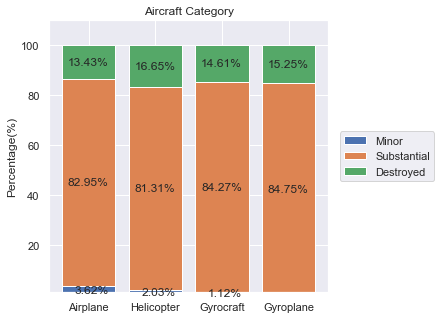

Airplane      22603
Helicopter     2852
Gyrocraft        89
Gyroplane        59
Name: Aircraft.Category, dtype: int64



In [39]:
# X variable with different categories
Aircraft_Category = ['Airplane','Helicopter','Gyrocraft','Gyroplane'] # we are not including XXX. 

# Creating an empty list for all 3 types of damages
substantialL=[]
destroyedL =[]
minorL =[]

# To append the values into the above list in the order of [Number of Airplane, Number of Helicopter, Number of Gyrocraft, Number of Gyroplane]
for i in Aircraft_Category:
    substantialL.append(len(tablefinal1[(tablefinal1['Aircraft.Category'] == i) & (tablefinal1['Aircraft.Damage'] == 'Substantial')])) 
    destroyedL.append(len(tablefinal1[(tablefinal1['Aircraft.Category'] == i) & (tablefinal1['Aircraft.Damage'] == 'Destroyed')]))
    minorL.append(len(tablefinal1[(tablefinal1['Aircraft.Category'] == i) & (tablefinal1['Aircraft.Damage'] == 'Minor')]))
    
#Normalizing
total = np.array(substantialL) + np.array(destroyedL) + np.array(minorL)
substantialL = (substantialL/total)*100
destroyedL = (destroyedL/total)*100
minorL = (minorL/total)*100

# Plot the graph
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.bar(Aircraft_Category, minorL, label='Minor')
ax.bar(Aircraft_Category, substantialL, bottom = minorL, label='Substantial')
ax.bar(Aircraft_Category, destroyedL, bottom = minorL + substantialL, label='Destroyed')

# Function to get the dimensions of the bars
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the data value and can used as the label
    label_text = f'{height:.2f}'+'%'  # f'{height:.2f}' to format decimal values

    # Coordinate of X and Y
    label_x = x + width - 0.10  # adjust to center the label
    label_y = y + height / 2
    
    # Plot label
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='right', va='center')
        
plt.ylim(1,110)
ax.set_ylabel('Percentage(%)')
ax.set(title = "Aircraft Category")
ax.legend(bbox_to_anchor=[1.4, 0.5],loc = "center right")
plt.show()

print(tablefinal1['Aircraft.Category'].value_counts())
print()

From this stacked bar chart, we can see that the severity of aircraft damaged does not really depends on the types of Aircraft Category. Coupled with the loss of significant amount of data, we decided to not use Aircraft Category as one of the predictor to predict Aircraft Damage

## Engine Type

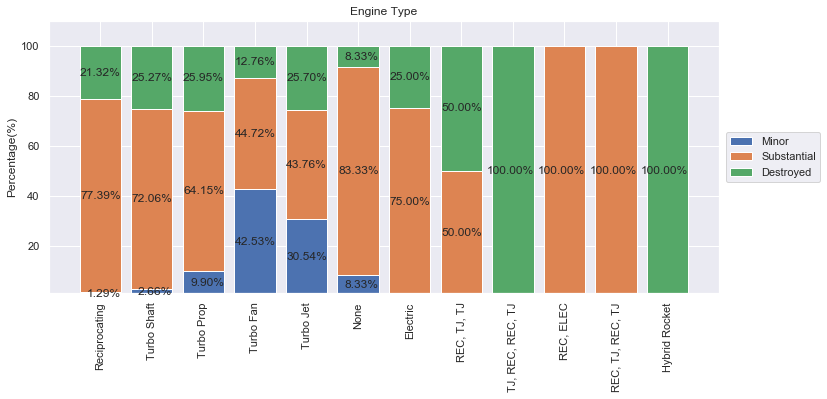

Reciprocating       67673
Turbo Shaft          3415
Turbo Prop           3052
Turbo Fan            1552
Turbo Jet             537
None                   12
Electric                8
REC, TJ, TJ             2
TJ, REC, REC, TJ        1
Hybrid Rocket           1
REC, TJ, REC, TJ        1
REC, ELEC               1
Name: Engine.Type, dtype: int64



In [45]:
# X variable with different categories
Engine_Type = ['Reciprocating','Turbo Shaft','Turbo Prop','Turbo Fan','Turbo Jet','None','Electric','REC, TJ, TJ','TJ, REC, REC, TJ','REC, ELEC','REC, TJ, REC, TJ','Hybrid Rocket']

# Creating an empty list and append for all 3 types of damages
substantialL=[]
destroyedL =[]
minorL =[]
for i in Engine_Type:
    substantialL.append(len(tablefinal2[(tablefinal2['Engine.Type'] == i) & (tablefinal2['Aircraft.Damage'] == 'Substantial')])) 
    destroyedL.append(len(tablefinal2[(tablefinal2['Engine.Type'] == i) & (tablefinal2['Aircraft.Damage'] == 'Destroyed')]))
    minorL.append(len(tablefinal2[(tablefinal2['Engine.Type'] == i) & (tablefinal2['Aircraft.Damage'] == 'Minor')]))
    
#Normalizing
total = np.array(substantialL) + np.array(destroyedL) + np.array(minorL)
substantialL = (substantialL/total)*100
destroyedL = (destroyedL/total)*100
minorL = (minorL/total)*100

# Plot the graph
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.bar(Engine_Type, minorL, label='Minor')
ax.bar(Engine_Type, substantialL, bottom = minorL, label='Substantial')
ax.bar(Engine_Type, destroyedL, bottom = minorL + substantialL, label='Destroyed')

# Function to get the dimensions of the bars
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the data value and can used as the label
    label_text = f'{height:.2f}'+'%'  # f'{height:.2f}' to format decimal values

    # Coordinate of X and Y
    label_x = x + width   # adjust to center the label
    label_y = y + height / 2
    
    # Plot label
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='right', va='center')

plt.ylim(1,110)
plt.xticks(rotation = 90)
ax.set_ylabel('Percentage(%)')
ax.set(title = "Engine Type")
ax.legend(bbox_to_anchor=[1.16, 0.5],loc = "center right")
plt.show()

print(tablefinal2['Engine.Type'].value_counts())
print()

From here, there are some variations of Aircraft Damage for different types of engine types which shows that there can be a relationship between Engine Type and Aircraft Damage. 

The small difference in proportion shows that Engine Type has some predictive power on Aircraft Damage. 

## Weather Condition

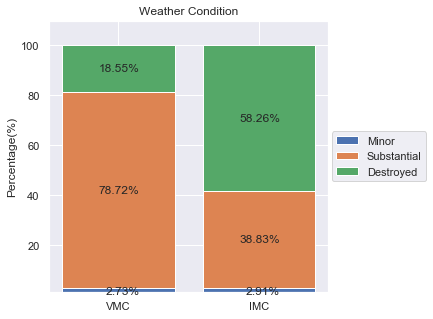

VMC    72545
IMC     5637
Name: Weather.Condition, dtype: int64



In [20]:
# X variable with different categories
Weather_Condition = ['VMC','IMC']

# Creating an empty list and append for all 3 types of damages
substantialL=[]
destroyedL =[]
minorL =[]
for i in Weather_Condition:
    substantialL.append(len(tablefinal3[(tablefinal3['Weather.Condition'] == i) & (tablefinal3['Aircraft.Damage'] == 'Substantial')])) 
    destroyedL.append(len(tablefinal3[(tablefinal3['Weather.Condition'] == i) & (tablefinal3['Aircraft.Damage'] == 'Destroyed')]))
    minorL.append(len(tablefinal3[(tablefinal3['Weather.Condition'] == i) & (tablefinal3['Aircraft.Damage'] == 'Minor')]))
    
#Normalizing
total = np.array(substantialL) + np.array(destroyedL) + np.array(minorL)
substantialL = (substantialL/total)*100
destroyedL = (destroyedL/total)*100
minorL = (minorL/total)*100

# Plot the graph
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.bar(Weather_Condition, minorL, label='Minor')
ax.bar(Weather_Condition, substantialL, bottom = minorL, label='Substantial')
ax.bar(Weather_Condition, destroyedL, bottom = minorL + substantialL, label='Destroyed')

# Function to get the dimensions of the bars
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the data value and can used as the label
    label_text = f'{height:.2f}'+'%'  # f'{height:.2f}' to format decimal values

    # Coordinate of X and Y
    label_x = x + width - 0.25  # adjust to center the label
    label_y = y + height / 2
    
    # Plot label
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='right', va='center')

plt.ylim(1,110)
ax.set_ylabel('Percentage(%)')
ax.set(title = "Weather Condition")
ax.legend(bbox_to_anchor=[1.37, 0.5],loc = "center right")
plt.show()

print(tablefinal3['Weather.Condition'].value_counts())
print()

We can see from this barplot that for weather condition to be IMC, there is a higher proportion of destroyed whereas for VMC, there is a higher proportion that the aircraft is subjected to substantial damage. Hence, Weather Condition can be a good predictor to predict the extent of Aircraft Damage. 

## Broad Phase Of Flight

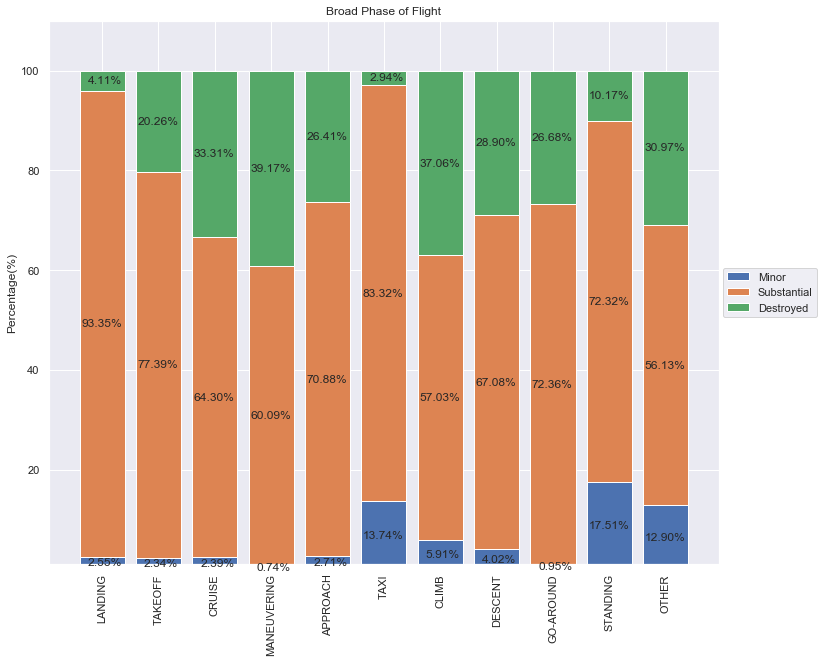

LANDING        20267
TAKEOFF        16000
CRUISE         10728
MANEUVERING    10296
APPROACH        7968
TAXI            2344
CLIMB           2199
DESCENT         2090
GO-AROUND       1679
STANDING        1062
OTHER            155
Name: Broad.Phase.of.Flight, dtype: int64



In [47]:
# X variable with different categories
Broad_Phase_of_Flight = ['LANDING','TAKEOFF','CRUISE','MANEUVERING','APPROACH','TAXI','CLIMB','DESCENT','GO-AROUND','STANDING','OTHER']

# Creating an empty list and append for all 3 types of damages
substantialL=[]
destroyedL =[]
minorL =[]
for i in Broad_Phase_of_Flight:
    substantialL.append(len(tablefinal4[(tablefinal4['Broad.Phase.of.Flight'] == i) & (tablefinal4['Aircraft.Damage'] == 'Substantial')])) 
    destroyedL.append(len(tablefinal4[(tablefinal4['Broad.Phase.of.Flight'] == i) & (tablefinal4['Aircraft.Damage'] == 'Destroyed')]))
    minorL.append(len(tablefinal4[(tablefinal4['Broad.Phase.of.Flight'] == i) & (tablefinal4['Aircraft.Damage'] == 'Minor')]))
    
#Normalizing
total = np.array(substantialL) + np.array(destroyedL) + np.array(minorL)
substantialL = (substantialL/total)*100
destroyedL = (destroyedL/total)*100
minorL = (minorL/total)*100

# Plot the graph
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.bar(Broad_Phase_of_Flight, minorL, label='Minor')
ax.bar(Broad_Phase_of_Flight, substantialL, bottom = minorL, label='Substantial')
ax.bar(Broad_Phase_of_Flight, destroyedL, bottom = minorL + substantialL, label='Destroyed')

# Function to get the dimensions of the bars
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the data value and can used as the label
    label_text = f'{height:.2f}'+'%'  # f'{height:.2f}' to format decimal values

    # Coordinate of X and Y
    label_x = x + width - 0.05  # adjust to center the label
    label_y = y + height / 2
    
    # Plot label
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='right', va='center')
        
plt.ylim(1,110)
plt.xticks(rotation = 90)
ax.set_ylabel('Percentage(%)')
ax.set(title = "Broad Phase of Flight")
ax.legend(bbox_to_anchor=[1.155, 0.5],loc = "center right")
plt.show()

print(tablefinal4['Broad.Phase.of.Flight'].value_counts())
print()

Likewise, here we can tell that there are some variation in the severity of the damage with different phase of flight. Hence, it can be a good predictor for our project.

## Amateur Built

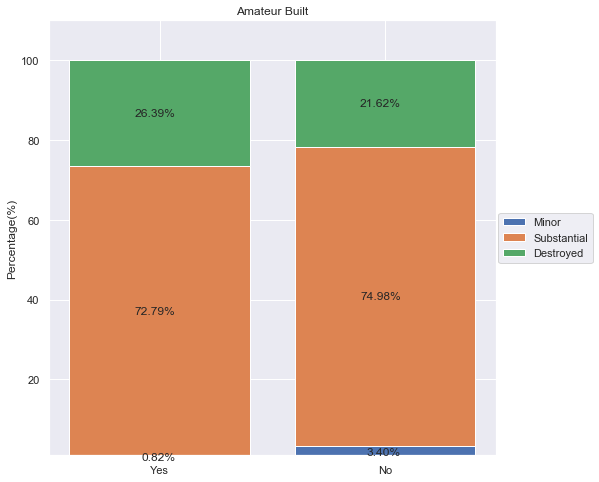

No     73057
Yes     8053
Name: Amateur.Built, dtype: int64



In [22]:
# X variable with different categories
Amateur_Built = ['Yes','No']

# Creating an empty list and append for all 3 types of damages
substantialL=[]
destroyedL =[]
minorL =[]
for i in Amateur_Built:
    substantialL.append(len(tablefinal5[(tablefinal5['Amateur.Built'] == i) & (tablefinal5['Aircraft.Damage'] == 'Substantial')])) 
    destroyedL.append(len(tablefinal5[(tablefinal5['Amateur.Built'] == i) & (tablefinal5['Aircraft.Damage'] == 'Destroyed')]))
    minorL.append(len(tablefinal5[(tablefinal5['Amateur.Built'] == i) & (tablefinal5['Aircraft.Damage'] == 'Minor')]))
    
#Normalizing
total = np.array(substantialL) + np.array(destroyedL) + np.array(minorL)
substantialL = (substantialL/total)*100
destroyedL = (destroyedL/total)*100
minorL = (minorL/total)*100

# Plot the graph
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.bar(Amateur_Built, minorL, label='Minor')
ax.bar(Amateur_Built, substantialL, bottom = minorL, label='Substantial')
ax.bar(Amateur_Built, destroyedL, bottom = minorL + substantialL, label='Destroyed')

# Function to get the dimensions of the bars
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the data value and can used as the label
    label_text = f'{height:.2f}'+'%'  # f'{height:.2f}' to format decimal values

    # Coordinate of X and Y
    label_x = x + width - 0.33  # adjust to center the label
    label_y = y + height / 2
    
    # Plot label
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='right', va='center')
        
plt.ylim(1,110)
ax.set_ylabel('Percentage(%)')
ax.set(title = "Amateur Built")
ax.legend(bbox_to_anchor=[1.23, 0.5],loc = "center right")

plt.show()

print(tablefinal5['Amateur.Built'].value_counts())
print()

For Amateur Built, we cannot see much variations in the type of Aircraft Damage, which lead us to conclude that it's not a good predictor. We are not using it in our prediction model. 

## Number of Engines

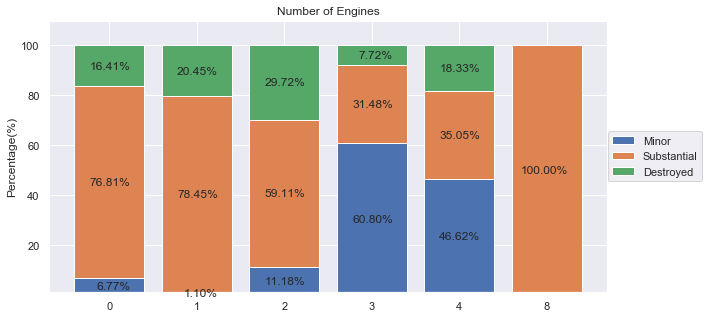

1    66170
2     9449
0     1048
3      324
4      311
8        1
Name: Number.of.Engines, dtype: int64



In [23]:
# X variable with different categories
Number_of_Engines = ['0','1','2','3','4','8']

# Creating an empty list and append for all 3 types of damages
substantialL=[]
destroyedL =[]
minorL =[]
for i in Number_of_Engines:
    substantialL.append(len(tablefinal6[(tablefinal6['Number.of.Engines'] == i) & (tablefinal6['Aircraft.Damage'] == 'Substantial')])) 
    destroyedL.append(len(tablefinal6[(tablefinal6['Number.of.Engines'] == i) & (tablefinal6['Aircraft.Damage'] == 'Destroyed')]))
    minorL.append(len(tablefinal6[(tablefinal6['Number.of.Engines'] == i) & (tablefinal6['Aircraft.Damage'] == 'Minor')]))
    
#Normalizing
total = np.array(substantialL) + np.array(destroyedL) + np.array(minorL)
substantialL = (substantialL/total)*100
destroyedL = (destroyedL/total)*100
minorL = (minorL/total)*100

# Plot the graph
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.bar(Number_of_Engines, minorL, label='Minor')
ax.bar(Number_of_Engines, substantialL, bottom = minorL, label='Substantial')
ax.bar(Number_of_Engines, destroyedL, bottom = minorL + substantialL, label='Destroyed')


# Function to get the dimensions of the bars
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the data value and can used as the label
    label_text = f'{height:.2f}'+'%'  # f'{height:.2f}' to format decimal values

    # Coordinate of X and Y
    label_x = x + width - 0.16  # adjust to center the label
    label_y = y + height / 2
    
    # Plot label
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='right', va='center')

plt.ylim(1,110)
ax.set_ylabel('Percentage(%)')
ax.set(title = "Number of Engines")
ax.legend(bbox_to_anchor=[1.18, 0.5],loc = "center right")

plt.show()

print(tablefinal6['Number.of.Engines'].value_counts())
print()

There are variations of Aircraft Damage for different number of engines. For example, there is a higher proportion of minor aircraft damage for aircraft with 3 engines as compared to aircraft with 0 engine, there is higher proportion of substantial damage.

We'll be using this predictor in our model.

## Purpose of Flight

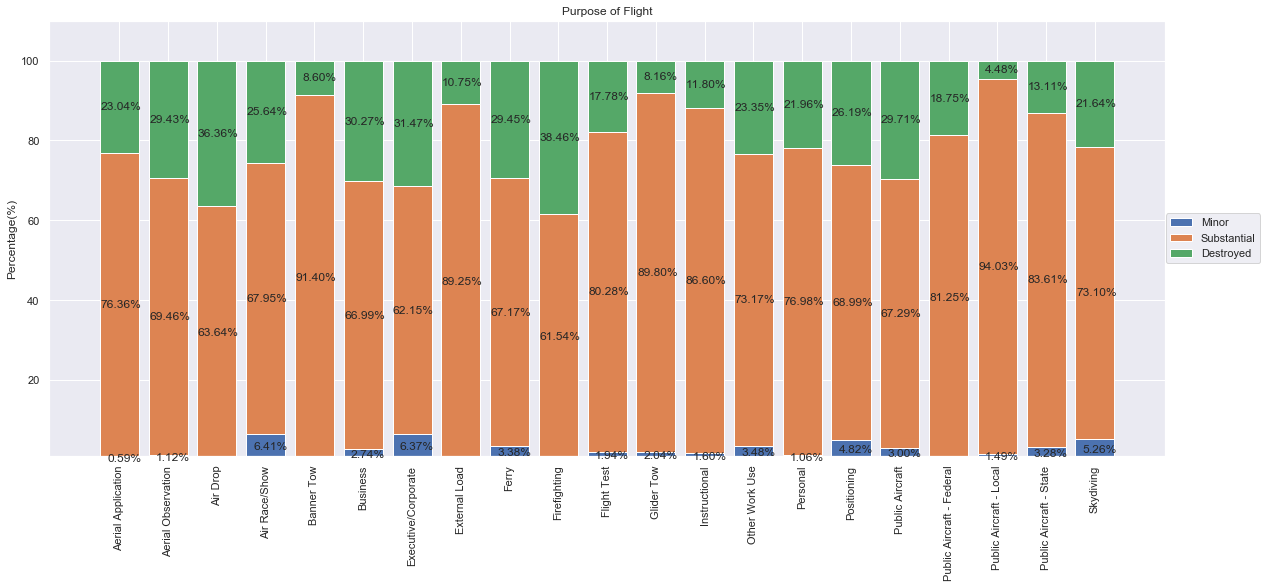

Personal                     46855
Instructional                10036
Aerial Application            4548
Business                      3875
Positioning                   1535
Other Work Use                1122
Ferry                          798
Aerial Observation             717
Public Aircraft                700
Executive/Corporate            502
Flight Test                    360
Skydiving                      171
Air Race/Show                  156
Public Aircraft - Federal       96
External Load                   93
Banner Tow                      93
Public Aircraft - Local         67
Public Aircraft - State         61
Glider Tow                      49
Firefighting                    26
Air Drop                        11
Name: Purpose.of.Flight, dtype: int64



In [52]:
# X variable with different categories
Purpose_of_Flight = ['Aerial Application','Aerial Observation','Air Drop','Air Race/Show','Banner Tow','Business','Executive/Corporate','External Load','Ferry','Firefighting','Flight Test','Glider Tow','Instructional','Other Work Use','Personal','Positioning','Public Aircraft','Public Aircraft - Federal','Public Aircraft - Local','Public Aircraft - State','Skydiving']

# Creating an empty list and append for all 3 types of damages
substantialL=[]
destroyedL =[]
minorL =[]
for i in Purpose_of_Flight:
    substantialL.append(len(tablefinal7[(tablefinal7['Purpose.of.Flight'] == i) & (tablefinal7['Aircraft.Damage'] == 'Substantial')])) 
    destroyedL.append(len(tablefinal7[(tablefinal7['Purpose.of.Flight'] == i) & (tablefinal7['Aircraft.Damage'] == 'Destroyed')]))
    minorL.append(len(tablefinal7[(tablefinal7['Purpose.of.Flight'] == i) & (tablefinal7['Aircraft.Damage'] == 'Minor')]))
    
# Normalizing
total = np.array(substantialL) + np.array(destroyedL) + np.array(minorL)

substantialL = (substantialL/total)*100
destroyedL = (destroyedL/total)*100
minorL = (minorL/total)*100

# Plot the graph
fig, ax = plt.subplots(1,1, figsize = (20,8))
ax.bar(Purpose_of_Flight, minorL, label='Minor')
ax.bar(Purpose_of_Flight, substantialL, bottom = minorL, label='Substantial')
ax.bar(Purpose_of_Flight, destroyedL, bottom = minorL + substantialL, label='Destroyed')

# Function to get the dimensions of the bars
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the data value and can used as the label
    label_text = f'{height:.2f}'+'%'  # f'{height:.2f}' to format decimal values

    # Coordinate of X and Y
    label_x = x + width + 0.05  # adjust to center the label
    label_y = y + height / 2
    
    # Plot label
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='right', va='center')

plt.ylim(1,110)
plt.xticks(rotation = 90)
ax.set_ylabel('Percentage(%)')
ax.set(title = "Purpose of Flight")
ax.legend(bbox_to_anchor=[1.09, 0.5],loc = "center right")

plt.show()

print(tablefinal7['Purpose.of.Flight'].value_counts())
print()

For Purpose Of Flight, we can see slight variation in the severity of aircraft damage for different applications. As such, we would still consider it as a predictor for our analysis. 

# Overall Conclusion made from Bi-variate Analysis

Overall, our group decides to use 5 variables from the above: Engine Type, Weather Condition, Broad Phase of Flight, Number of Engines and Purpose of Flight to predict severity of Aircraft Damage. Statistical value of importance will be used in the following section to confirm our choices. 

# (2) Multi-variate Analysis, see which of the chosen predictors are more important in the Aviation Data for prediction. 

### Setting up Random Forest (RF) as a model for multi-variate analysis.

In [25]:
# All this is for RF, DT, permutation & feature importance, turning categorical data to numerical for both analysis & prediction. 
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [26]:
# Table with only the 5 variable. 
Data = pd.DataFrame(AD[['Engine.Type', 'Broad.Phase.of.Flight', 'Weather.Condition','Number.of.Engines','Purpose.of.Flight','Aircraft.Damage']])

In [27]:
# Filter and drop rows with blank
Mod_Data = Data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# Remove stated unknown data from the dataframe
to_drop = ['Unknown']
Mod_Data = Mod_Data[~Mod_Data['Engine.Type'].isin(to_drop)]
Mod_Data = Mod_Data[~Mod_Data['Purpose.of.Flight'].isin(to_drop)]
to_drop = ['UNKNOWN']
Mod_Data = Mod_Data[~Mod_Data['Broad.Phase.of.Flight'].isin(to_drop)]
to_drop = ['UNK']
Mod_Data = Mod_Data[~Mod_Data['Weather.Condition'].isin(to_drop)]

Mod_Data

,Engine.Type,Broad.Phase.of.Flight,Weather.Condition,Number.of.Engines,Purpose.of.Flight,Aircraft.Damage
0,Reciprocating,TAKEOFF,VMC,1.0,Personal,Substantial
1,Reciprocating,TAKEOFF,VMC,1.0,Personal,Destroyed
5,Turbo Prop,TAKEOFF,IMC,2.0,Executive/Corporate,Destroyed
14,Reciprocating,LANDING,VMC,1.0,Instructional,Substantial
21,Reciprocating,CRUISE,VMC,1.0,Personal,Substantial
...,...,...,...,...,...,...
84252,Reciprocating,CRUISE,IMC,1.0,Personal,Substantial
84253,Reciprocating,APPROACH,VMC,1.0,Personal,Substantial
84254,Reciprocating,LANDING,VMC,1.0,Personal,Substantial
84258,Reciprocating,CRUISE,IMC,1.0,Personal,Destroyed


After removing, there is still ~65K data. 
That is decent considering that the original dataset has about 85K. 

In [28]:
# Extract Response and Predictors
y = pd.DataFrame(Mod_Data["Aircraft.Damage"])
X = pd.DataFrame(Mod_Data[['Engine.Type', 'Broad.Phase.of.Flight', 'Weather.Condition','Number.of.Engines','Purpose.of.Flight']])

We need to convert the categorical features into numeric attributes to fit inside the model work.
3 options:
    1. Hashing trick
    2. H20 random forest
    3. Pipeline One Hot encoding 

we will be using no.3 at this point. 

In [29]:
# Turning categorical data to numerical data 

# Separate categorical & numerical columns
categorical_columns = ['Engine.Type', 'Broad.Phase.of.Flight', 'Weather.Condition','Purpose.of.Flight']
numerical_columns = ['Number.of.Engines']

X = X[categorical_columns + numerical_columns]

# Split response & predictors 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

# Include SimpleImputer & OneHotEncoder for processing categorical 
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# OneHotEncoder is to convert categorical data to binary numerical data. 
# SimpleImputer is to fill in data by either a string or calculated numerical mean. 

# SimpleImputer for processing numerical
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

# Transforming the categorical and numerical data.
preprocessing = ColumnTransformer(
    [('cat', categorical_pipe, categorical_columns),
     ('num', numerical_pipe, numerical_columns)])

# Something fun here. We're using assigned (& pipelined) transformers (which are onehotencoder & simpleimputer) to process the data. 
# for learning purposes, see: https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b

# Fit data into Random Forest, then train it. 
rf = RandomForestClassifier() 

# Process data before running through RF
rf = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', RandomForestClassifier(random_state=42, class_weight="balanced")) #with weighted data! 
])

rf.fit(X_train, y_train)

dectree = DecisionTreeClassifier()  

dectree = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', DecisionTreeClassifier(random_state=0, class_weight="balanced")) #with weighted data! 
])


# train the decision tree model
dectree.fit(X_train, y_train)  



C:\Users\Shane\anaconda3\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                        

Now that we have fitted the data with the Random Forest model, we will use two techniques to determine which variables are important. They are  Feature Importance and Permutation Importance.

# (a) Feature Importance

Feature Importance compute the drop in Gini Impurity within splits in RF, then averaged it. 

The largest average drop is deem to have the highest predictive ability. 

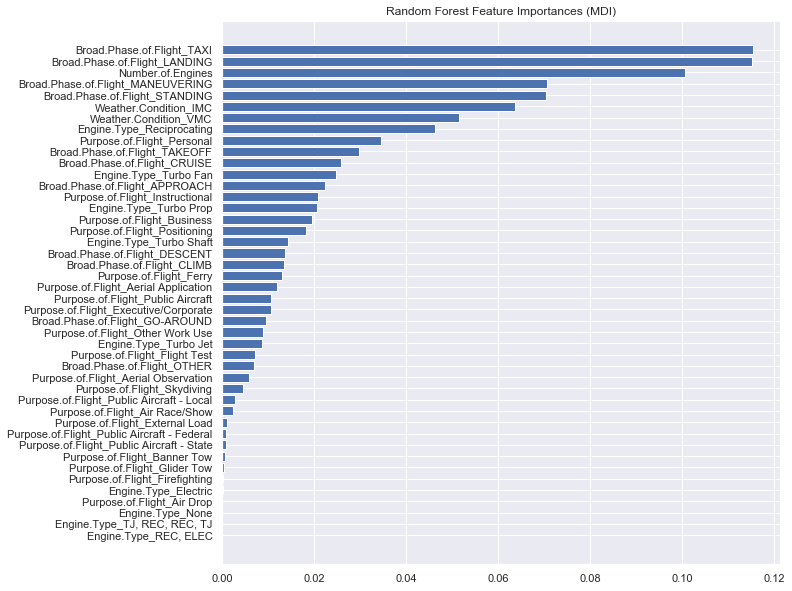

In [30]:
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_columns)
feature_names = np.r_[feature_names, numerical_columns]

# Calculating feature importance
tree_feature_importances = (
    rf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

# Plotting the graph
y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.barh(y_ticks,tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
plt.show()

Here we can see that TAXI & LANDING under Broad.Phase.of.Flight and Number.of.Engines are the top 3 predictive indicator for the response. 

However we've decided that permutation importance might be better in showing which variable has higher predictive ability because the figures attained from feature importance might be inflated by the change in Gini impurity down each decision tree in RF. 

See: https://explained.ai/rf-importance/index.html

# (b) Permutation Importance

Permutation Importance permutes the column value of predictor values, pass through RF, then compare the accuracy score before and after. 

Largest drop in accuracy (against a baseline accuracy) is deemed to have highest predictive ability. 

Computationally more demanding than Feature Importance, but more reliable. 

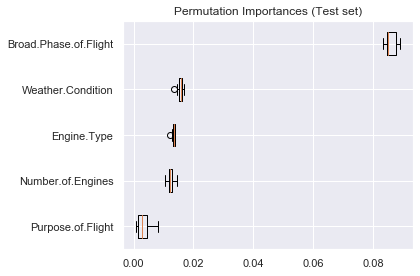

In [31]:
# Calculating permutation importance for test data. 
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

# Plotting the graph
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (Test set)")
fig.tight_layout()
plt.show()

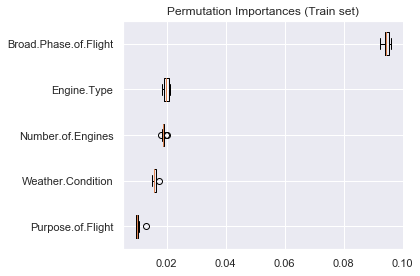

In [32]:
# Calculating permutation importance for train data. 
result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

# Plotting the graph
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (Train set)")
fig.tight_layout()
plt.show()

With Permutation Importance, we can see that the most variable with the highest predictive ability is "Broad Phase of Flight". It's about 9%.

Coming in 2nd/3rd/4th, which are all about the same (1%<p<2%) is "Engine Type", "Number of Engines" & "Weather Condition". 

# Overall Conclusion from multivariable analysis:

In order of importance: 

(1) Broad Phase of Flight

(2) Engine Type, 
   Number of Engines, 
   Weather Condition
   
(5) Purpose of Flight

# (3) Prediction model: Decision Tree (DT) vs Random Forest (RF) to see which model is more accurate 

Since we run and trained both Decision Tree & Random Forest at the multivariate-analysis section, we'll plot the confusion matrix on both models here. 

# (a) Train data

[Text(0.5, 1, 'Decision Tree (Train)')]

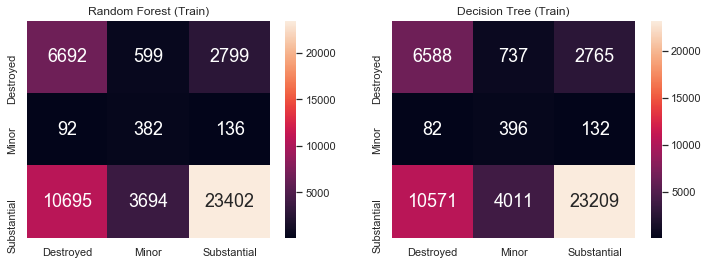

In [33]:
#Predict response according to predictors using RF model
y_train_pred = rf.predict(X_train)

# Predict response according to predictors using Decision tree model
y_train_pred2 = dectree.predict(X_train)

RF_matrix = confusion_matrix(y_train, y_train_pred)
DT_matrix = confusion_matrix(y_train, y_train_pred2)
tick_labels = ['Destroyed', 'Minor', 'Substantial']

#Plot confusion matrix for Random Forest
f, axes = plt.subplots(1, 2, figsize=(12, 4)) 
RF_plot = sb.heatmap(RF_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
RF_plot.set_xticklabels(tick_labels)
RF_plot.set_yticklabels(tick_labels)
RF_plot.set(title = "Random Forest (Train)")

#Plot confusion matrix for Decision Tree
DT_plot = sb.heatmap(DT_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
DT_plot.set_xticklabels(tick_labels)
DT_plot.set_yticklabels(tick_labels)
DT_plot.set(title = "Decision Tree (Train)")

In [53]:
print("The total number of Correctly Predicted for Random Forest Model =", RF_matrix[0,0]+RF_matrix[1,1]+RF_matrix[2,2])
print("The total number of Correctly Predicted for Decision Tree Model =", DT_matrix[0,0]+DT_matrix[1,1]+DT_matrix[2,2])
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("DT train accuracy: %0.3f" % dectree.score(X_train, y_train))

The total number of Correctly Predicted for Random Forest Model = 9988
The total number of Correctly Predicted for Decision Tree Model = 9860
RF train accuracy: 0.628
DT train accuracy: 0.623


# (b) Test data

[Text(0.5, 1, 'Decision Tree (Test)')]

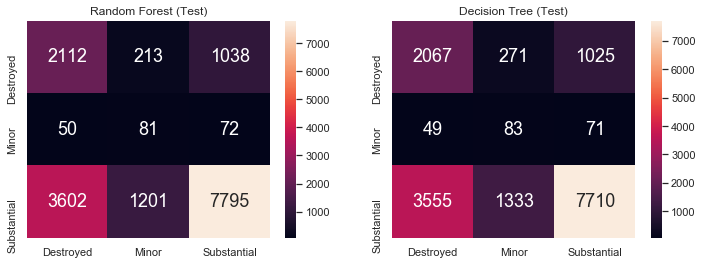

In [35]:
#Predict response according to predictors using RF model
y_test_pred = rf.predict(X_test)

# Predict response according to predictors using Decision tree model
y_test_pred2 = dectree.predict(X_test)

RF_matrix = confusion_matrix(y_test, y_test_pred)
DT_matrix = confusion_matrix(y_test, y_test_pred2)
tick_labels = ['Destroyed', 'Minor', 'Substantial']

#Plot confusion matrix for random forest
f, axes = plt.subplots(1, 2, figsize=(12, 4)) 
RF_plot = sb.heatmap(RF_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
RF_plot.set_xticklabels(tick_labels)
RF_plot.set_yticklabels(tick_labels)
RF_plot.set(title = "Random Forest (Test)")

#Plot confusion matrix for Decision Tree
DT_plot = sb.heatmap(DT_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
DT_plot.set_xticklabels(tick_labels)
DT_plot.set_yticklabels(tick_labels)
DT_plot.set(title = "Decision Tree (Test)")

In [54]:
print("Test:")
print("The total number of Correctly Predicted for Random Forest Model =", RF_matrix[0,0]+RF_matrix[1,1]+RF_matrix[2,2])
print("The total number of Correctly Predicted for Decision Tree Model =", DT_matrix[0,0]+DT_matrix[1,1]+DT_matrix[2,2])

# Accuracy based on TP & TN.
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))
print("DT test accuracy: %0.3f" % dectree.score(X_test, y_test))

Test:
The total number of Correctly Predicted for Random Forest Model = 9988
The total number of Correctly Predicted for Decision Tree Model = 9860
RF test accuracy: 0.618
DT test accuracy: 0.610


One interesting fact is that before weighing the data the classification accuracy score for both RF and DT is about 0.80. 

It's important to weigh a biased dataset (high proportion of Substantial damaged, relatively low proportion of Destroyed, and even lower for Minor) to make the outcome fairer. 

Even with a weighed dataset, both models have classification accuracy of ~0.62, which is decent.

## Comparing between Decision Tree & Random Forest

In theory, the classification accuracy of RF will be higher than that of DT. 

This is because a large number of uncorrelated trees operating will outperform the individual decision tree. 

And our RF and DT model has shown this to be true, with RF having slightly higher classification accuracy than DT, for both train and test data. 

It's worth noting that the accuracy score is consistent as it is similar for both train and test data. We randomise the data 10 times, and the accuracy score for RF ranges from 0.616-0.636 and DT from 0.604-0.626. 

# Overall conclusion from Prediction model

RF and DT prediction model have classification accuracy of ~0.62 on both train and test data, with RF having a slightly higher accuracy score. 

We conclude with using RF model for prediction.

# (4) Conclusion of project

Given that a plane is already damaged, our RF prediction model can predict the degree of damage with ~62% accuracy by inputting data into the 5 predictors, in order of its importance:

(1) Broad Phase of Flight

(2) Engine Type, 
   Number of Engines, 
   Weather Condition
   
(5) Purpose of Flight


For example, if we input random variables into these 5 predictors:

In [37]:
Test_data = [
    {'Engine.Type': 'Reciprocating', 'Broad.Phase.of.Flight': 'TAKEOFF', 'Weather.Condition': 'VMC', 'Number.of.Engines': '1', 'Purpose.of.Flight': 'Positioning'},
    {'Engine.Type': 'Reciprocating', 'Broad.Phase.of.Flight': 'MANEUVERING', 'Weather.Condition': 'VMC', 'Number.of.Engines': '0', 'Purpose.of.Flight': 'Instructional'},
    {'Engine.Type': 'Turbo Jet', 'Broad.Phase.of.Flight': 'CRUISE', 'Weather.Condition': 'IMC', 'Number.of.Engines': '3', 'Purpose.of.Flight': 'Personal'},
    {'Engine.Type': 'Turbo Fan', 'Broad.Phase.of.Flight': 'LANDING', 'Weather.Condition': 'VMC', 'Number.of.Engines': '2', 'Purpose.of.Flight': 'Aerial Application'},
    {'Engine.Type': 'Turbo Prop', 'Broad.Phase.of.Flight': 'TAXI', 'Weather.Condition': 'IMC', 'Number.of.Engines': '4', 'Purpose.of.Flight': 'Business'},
]

TD = pd.DataFrame(Test_data)
TD

,Engine.Type,Broad.Phase.of.Flight,Weather.Condition,Number.of.Engines,Purpose.of.Flight
0,Reciprocating,TAKEOFF,VMC,1,Positioning
1,Reciprocating,MANEUVERING,VMC,0,Instructional
2,Turbo Jet,CRUISE,IMC,3,Personal
3,Turbo Fan,LANDING,VMC,2,Aerial Application
4,Turbo Prop,TAXI,IMC,4,Business


In [38]:
y_train_pred_e = rf.predict(TD)
TD['Predicted Damage'] = y_train_pred_e
TD

C:\Users\Shane\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


,Engine.Type,Broad.Phase.of.Flight,Weather.Condition,Number.of.Engines,Purpose.of.Flight,Predicted Damage
0,Reciprocating,TAKEOFF,VMC,1,Positioning,Substantial
1,Reciprocating,MANEUVERING,VMC,0,Instructional,Destroyed
2,Turbo Jet,CRUISE,IMC,3,Personal,Destroyed
3,Turbo Fan,LANDING,VMC,2,Aerial Application,Substantial
4,Turbo Prop,TAXI,IMC,4,Business,Minor


...We get the predicted degree of damage at the rightmost column, with an accuracy of ~62%. 

# Flaws & limitations:

(1) The test response is biased. Although weighing is applied to the model, the biasness of the response data is reduced but it is not fully eliminated. 

(2) The dataset used are all accident cases in US. Cases that do not have accidents are not covered. So we cannot generalise and claim to predict anything more than the degree of damage, given that it is already damaged.

#  References

Data Cleaning Function
https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php 

Dropping of rows that consists of particular strings(Data Cleaning)
https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p 

Stacked Bar Chart
https://pythonmatplotlibtips.blogspot.com/2018/11/normalized-stacked-barplot-number-percentage-python-matplotlib.html 

Data Pipelining(Column Transform)
https://jorisvandenbossche.github.io/blog/2018/05/28/scikit-learn-columntransformer/

Machine Learning Classifiers 
https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623

Replacing Strings with numerical values
https://www.geeksforgeeks.org/replacing-strings-with-numbers-in-python-for-data-analysis/

Random Forest explained
https://www.youtube.com/watch?v=eM4uJ6XGnSM